In [1]:
import cv2
import pytesseract
import os
import matplotlib.pyplot as plt

In [79]:
def LoadFrame(filename, dirpath):
    full_path = os.path.join(dirpath, filename)
    return cv2.imread(full_path)

def PlotCv2ImageWithPlt(image, title='No Name'):
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img, interpolation='none')
    plt.title(title)
    plt.show()
    
    
def ColorOrShape(listofwords, colors_list, shapes_list):
    #colors_list = ['green', 'orange', 'pink', 'brown', 'red', 'yellow', 'blue', 'purple']
    #shapes_list = ["circle", "octagon", "pentagon", "rectangle", "rhombus", "square", "star", "triangle"]
    for word in listofwords:
        if word in colors_list:
            return 0
        if word in shapes_list:
            return 1
    return None

def RecognizeShapesFromListWords(listofwords):
    colors_list = ['green', 'orange', 'pink', 'brown', 'red', 'yellow', 'blue', 'purple']
    shapes_list = ["circle", "octagon", "pentagon", "rectangle", "rhombus", "square", "star", "triangle"]
    colorshap = ColorOrShape(listofwords, colors_list, shapes_list)
    if colorshap is None:
        return None
    elif colorshap == 0: 
        finallist = PickClosestWords(listofwords, colors_list)
        finallist.insert(0,0)
        return finallist
    elif colorshap == 1:
        finallist = PickClosestWords(listofwords, shapes_list)
        finallist.insert(0,1) 
        return finallist
    return None 

def PickClosestWords(listofwords, wordsdictionary):
    result_list = []
    for word in listofwords:
        if word in wordsdictionary:
            result_list.append(word)
        else:
            IsClose, DictionaryWord = CloseByOneLetter2(word, wordsdictionary)
            if IsClose:
                result_list.append(DictionaryWord)
    return result_list

def CloseByOneLetter(word, wordsdictionary):
    wordletterslist = [*word]
    for dictionaryword in wordsdictionary:
        dictionarywordletterslist = [*dictionaryword]
        if len(wordletterslist) == len(dictionarywordletterslist):
            strike = 0
            for letteridx in range(len(wordletterslist)):
                if wordletterslist[letteridx] != dictionarywordletterslist[letteridx]:
                    strike += 1
            if strike <= 1:
                return 1, dictionaryword
    return 0, None

def CloseByOneLetter2(word, wordsdictionary):
    wordletterslist = [*word]
    for dictionaryword in wordsdictionary:
        dictionarywordletterslist = [*dictionaryword]
        if len(wordletterslist) == len(dictionarywordletterslist): # if all the letters are there but one letter is incorrect 
            strike = 0
            for letteridx in range(len(wordletterslist)):
                if wordletterslist[letteridx] != dictionarywordletterslist[letteridx]:
                    strike += 1
            if strike <= 1:
                return 1, dictionaryword
        elif len(wordletterslist) == len(dictionarywordletterslist) -1 :# if one letter is missing in read word
            strike = 0
            dictidx = 0
            wordidx = 0
            while dictidx < len(dictionarywordletterslist):
                if wordletterslist[wordidx] == dictionarywordletterslist[dictidx]:
                    dictidx +=1
                    wordidx +=1
                else:
                    dictidx +=1
                    strike += 1
            if strike <= 1:
                return 1, dictionaryword
            
    return 0, None

In [48]:
dirpath = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pics_from_1658831841451"
filename = r"frame231.jpg"
screen_frame = [50, 450, 500, 700]

In [12]:
dirpath = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pics_from_1658831841451"
filename = r"frame236.jpg"
screen_frame = [20, 450, 550, 700]

In [15]:
dirpath = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pics_from_1658831841451"
filename = r"frame240.jpg"
screen_frame = [20, 450, 500, 730]

In [70]:
dirpath = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\Simon_Resources\pics_from_tello_pov"
filename = r"frame162.jpg"
screen_frame = [180, 420, 450, 700]

screen_frame = [229, 337, 511, 669]

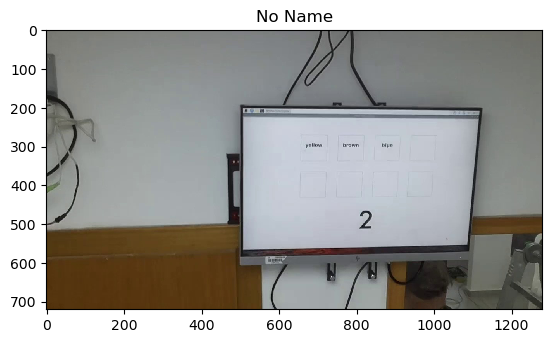

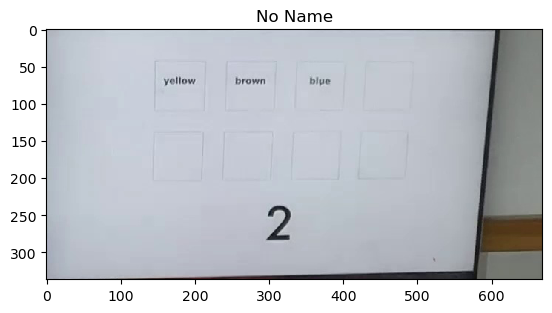

In [71]:
ScreenFrame = LoadFrame(filename, dirpath)
PlotCv2ImageWithPlt(ScreenFrame)
SilverScreen = ScreenFrame[screen_frame[0]:screen_frame[0] + screen_frame[1], screen_frame[2]:screen_frame[2] + screen_frame[3]]
img = SilverScreen
PlotCv2ImageWithPlt(img)

In [72]:
img = cv2.resize(img, None, fx=2.5, fy=2.5,
                 interpolation=cv2.INTER_CUBIC)
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.adaptiveThreshold(gry, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY_INV, 25, 28)
bnt = cv2.bitwise_not(thr)
txt = pytesseract.image_to_string(bnt, config="--psm 6")
print(txt)

yellow brown ble |
Be



In [73]:
str_list = txt.split()
str_list

['yellow', 'brown', 'ble', '|', 'Be']

In [80]:
RecognizeShapesFromListWords(str_list)

[0, 'yellow', 'brown', 'blue']